In [26]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt

from alad_mod.alad import ALAD
from evaluation.histogram_builder import *

In [ ]:
#plot raw
#plot presel
#plot ad
#plot postsel

# for every proc compute
    # n
    # n_pres, n_a, n_p
    
# stack plot, w, dy, tt

#compute weights
#w = (xsec*K*lum) / N_file

# create plots with content = n * w
# for data uncertainty is sqrt(n)

In [ ]:
thres = 110

def pre_select():
    pass

def anomaly_select():
    pass

def post_select():
    pass

def build_hists(x, n_max, batch_size=2 ** 20, hist_settings=settings_6021):
    builder_raw = HistogramBuilder(hist_settings)
    builder_pre = HistogramBuilder(hist_settings)
    builder_ano= HistogramBuilder(hist_settings)
    builder_pos = HistogramBuilder(hist_settings)

    n = x.shape[0]
    #n = min(n, n_max)

    sample_fraction = min(n_max/n, 1)
    sample_size = int(batch_size*sample_fraction)

    n_batches = int(n / batch_size) + 1
    for t in range(n_batches):
        print('batch number ' + str(t))
        ran_from = int(t * batch_size)
        ran_to = (t + 1) * batch_size
        ran_to = int(np.clip(ran_to, 0, n))
        x_batch = x[ran_from:ran_to]
        
        if sample_fraction < 0.5:
            idx = np.arange(0,batch_size)
            idx = np.random.choice(idx, sample_size, replace=False)
            x_raw = x_batch[idx]
        else:
            x_raw = x_batch
        
        # raw
        builder_raw.add_data(x_raw)
        
        # pre selection
        x_pre = pre_select(x_raw)
        builder_pre.add_data(x_pre)
        
        # anomaly selection
        x_ano = anomaly_select(x_pre)
        builder_ano.add_data(x_ano)
        
        # post selection
        x_pos = post_select(x_ano)
        builder_pos.add_data(x_pos)
        
    return builder_raw.get_histogram_data(), builder_pre.get_histogram_data(),\
           builder_ano.get_histogram_data(), builder_pos.get_histogram_data()

In [ ]:
#compute hist for raw, pres, ad, pos

n_max = int(10e6)

sets = {}
sets['dy1jets'] = {'file': '/home/oliverkn/pro/7719/data.hdf5', 'xsec':561, 'K':1.23}
sets['dy2jets'] = {'file': '/home/oliverkn/pro/7721/data.hdf5', 'xsec':181, 'K':1.23}
sets['dy3jets'] = {'file': '/home/oliverkn/pro/7722/data.hdf5', 'xsec':51, 'K':1.23}
sets['dy4jets'] = {'file': '/home/oliverkn/pro/7723/data.hdf5', 'xsec':15, 'K':1.23}

sets['w1jets'] = {'file': '/home/oliverkn/pro/9863/data.hdf5', 'xsec':4480, 'K':1.23}
sets['w2jets'] = {'file': '/home/oliverkn/pro/9864/data.hdf5', 'xsec':1435, 'K':1.23}
sets['w3jets'] = {'file': '/home/oliverkn/pro/9865/data.hdf5', 'xsec':304, 'K':1.23}

sets['ttbar'] = {'file': '/home/oliverkn/pro/9588/data.hdf5', 'xsec':164, 'K':1.66}

#sets['data'] = {'file': '/home/oliverkn/pro/9588/data.hdf5', 'xsec':164, 'K':1.66}


for key, set in sets.items():
    # load data
    file = set['file']
    x = h5py.File(file, 'r')['data']
    
    # build hists
    print('building ' + key)
    hist_raw, hist_pre, hist_ano, hist_pos = build_hists(x, n_max=n_max, thres=thres)
    set['hist_raw'] = hist_raw
    set['hist_pre'] = hist_pre
    set['hist_ano'] = hist_ano
    set['hist_pos'] = hist_pos
    
    n_events = hist_raw['HT']['n']
    n_events_a = hist_ano['HT']['n']
    print('%d / %d = %3d_ppm' % (n_events_a, n_events, (n_events_a / n_events*1e6)))


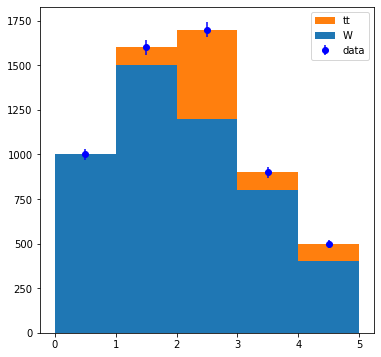

In [25]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

w = np.array([10,15,12,8,4])*100
tt = np.array([0, 1, 5, 1, 1])*100
data = w + tt

bin_edges = np.arange(0, 6)

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

ax.hist([bin_edges[:-1]]*2, bin_edges, weights=[w, tt], label=['W', 'tt'],stacked=True, histtype='stepfilled')
ax.errorbar(bin_centers, data, yerr=np.sqrt(data), fmt='bo', label='data')

ax.legend()

plt.show()

In [37]:
x = h5py.File('/home/oliverkn/pro/7719/data.hdf5', 'r')['data']

x_batch = x[:1000000]

a = np.arange(0,1000000)
s = np.random.choice(a, 10000, replace=False)
print(x_batch[s].shape)


(10, 23)
